<a href="https://colab.research.google.com/github/himanshigarg01/Data_Science_Projects/blob/main/Olympics_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
medals_data = pd.read_excel(io.BytesIO(uploaded['Medals.xlsx']))

Saving Medals.xlsx to Medals.xlsx


/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
medals_data

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location (As in where is the data centred)

In [ ]:
#mean
medals_data["Total"].mean()

11.612903225806452

In [ ]:
import numpy as np

In [ ]:
 #weighted mean
 np.average(medals_data["Total"], weights=medals_data["Gold"])

46.832352941176474

In [ ]:
#trim mean
from scipy.stats import trim_mean
trim_mean(medals_data["Gold"],0.1)


1.96

In [ ]:
#median
np.median(medals_data["Total"])

4.0

In [ ]:
 #weighted median
def weighted_median (df, median_col, weight_col):
  df_sorted = df.sort_values (median_col)
  cumsum = df_sorted[weight_col].cumsum()
  cutoff = df_sorted [weight_col].sum() / 2.
  return df_sorted [cumsum >= cutoff] [median_col].iloc [0]
weighted_median(medals_data, "Total", "Gold")

40

In [ ]:
#percentile
Q3 = np.percentile (medals_data["Total"], 75)
Q3

11.0

In [ ]:
medals_data.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability

In [ ]:
#variance
from statistics import variance
variance(medals_data["Gold"])

49.315100514259

In [ ]:
#std deviation
from statistics import stdev
stdev(medals_data["Gold"])

7.022471111671376

In [ ]:
#mean absolute dev
from numpy import mean, absolute
mean(absolute(medals_data["Gold"] - mean(medals_data["Gold"])))

4.0048560527228485

In [ ]:
# median abs dev
from numpy import median, absolute
median(absolute(medals_data["Gold"] - median(medals_data["Gold"])))

1.0

In [ ]:
#interquartile range
Q3, Q1 = np.percentile(medals_data["Gold"], [75,25])
iqr= Q3-Q1
iqr

3.0

##  Exploring the Data Distribution

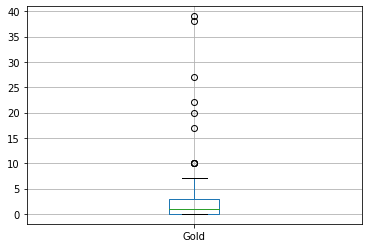

In [ ]:
 #boxplot
 medals_data.boxplot(column="Gold", by=None, ax=None)

In [ ]:
#Frequency Table
frequency_table = medals_data.copy()
frequency_table["freq"] = pd.cut(medals_data["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <a list of 30 Patch objects>)

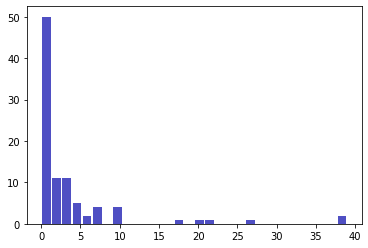

In [ ]:
#histogram
import matplotlib.pyplot as plt
plt.hist(x=medals_data["Gold"], bins = 'auto', color = '#0504aa' , alpha= 0.7, rwidth=0.85)

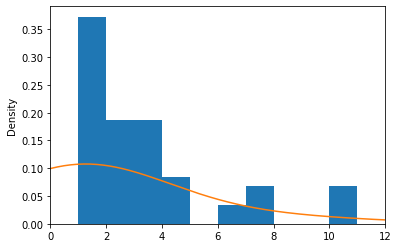

In [ ]:
#Density Plot
ax = medals_data["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medals_data["Gold"].plot.density (ax=ax)

## Exploring Binary and Categorical Data

In [ ]:
#mode
medals_data["Gold"].mode()

0    0
dtype: int64

Text(0, 0.5, 'Gold Count')

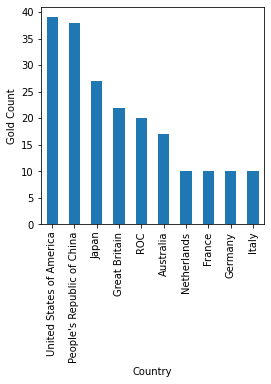

In [ ]:
#bar chart
ax= medals_data.iloc[:10].plot.bar(x="Team/NOC", y="Gold", figsize=(4, 4), legend=False)
ax.set_xlabel("Country")
ax.set_ylabel("Gold Count")

([<matplotlib.patches.Wedge at 0x7f989db0b810>,
 [Text(-0.7155314051070093, 0.8354728052459811, 'United States of America'),
  Text(-0.9458998161617527, -0.5614922419634689, "People's Republic of China"),
  Text(0.15924203448189886, -1.0884125938512774, 'Japan'),
  Text(0.9458998161617524, -0.5614922419634694, 'Great Britain'),
  Text(1.0717821060885606, 0.247554270955622, 'ROC'),
  Text(0.6847227019531091, 0.8609034913566292, 'Australia'),
  Text(0.19865842661840455, 1.081912579432137, 'Netherlands')],
 [Text(-0.39028985733109595, 0.45571243922508053, '22.5%'),
  Text(-0.5159453542700468, -0.3062684956164376, '22.0%'),
  Text(0.0868592915355812, -0.5936795966461513, '15.6%'),
  Text(0.5159453542700467, -0.30626849561643776, '12.7%'),
  Text(0.5846084215028512, 0.13502960233943015, '11.6%'),
  Text(0.3734851101562413, 0.46958372255816133, '9.8%'),
  Text(0.10835914179185702, 0.590134134235711, '5.8%')])

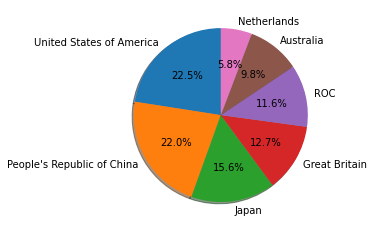

In [ ]:
#piechart
pie_data = medals_data.iloc[:7, :]
plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"], autopct='%1.1f%%',shadow=True, startangle=90)

## Correlation

In [ ]:
medals_data.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


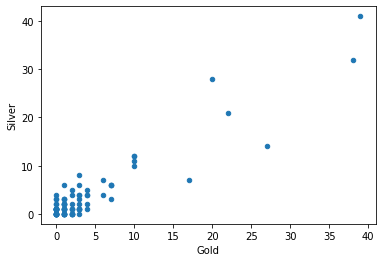

In [ ]:
medals_data.plot.scatter(x="Gold", y="Silver")

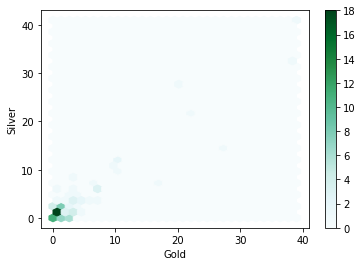

In [ ]:
#hexagonal binning
medals_data.plot.hexbin(x="Gold", y="Silver", gridsize=30, sharex=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


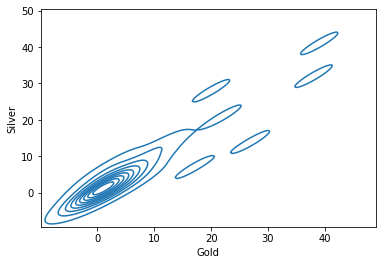

In [ ]:
#contour plot
import seaborn as sns
ax = sns.kdeplot(medals_data["Gold"], medals_data["Silver"])
ax

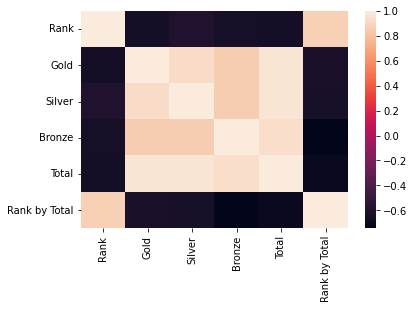

In [ ]:
#heatmap
sns.heatmap(medals_data.corr())

In [ ]:
#contingency table
crosstab = medals_data[["Team/NOC", "Gold"]].pivot_table(index= "Team/NOC", columns ='Gold', aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Team/NOC,,,,,,,,,,,,,,,
Argentina,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Armenia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
Austria,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Azerbaijan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
United States of America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
Uzbekistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


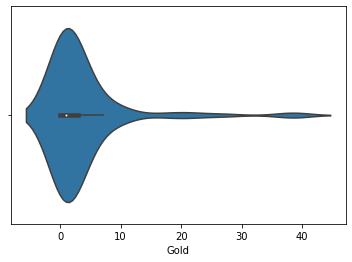

In [ ]:
#violin plot
sns.violinplot(x=medals_data["Gold"])